**Wine Data:**
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. So it contains 13 feature and 178 instances

In [2]:
import pandas as pd
import numpy as np


In [5]:
path="wine.data"
Data=pd.read_csv(path, header=None)

In [6]:
Data.head(100)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
96,2,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625
97,2,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428
98,2,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660


**Step 1: Cleaning the data**
Check for the nulls:

In [7]:
# Lets see the data has None values.
Data.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
dtype: bool

**Step 2:**
Data description


By taking a look on data description and comparing the mean, minimum, and maximum record of each column we can realize that there is no any extreme values.

In [8]:
Data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**[Data] is balanced or not**?

In [9]:
Data[0].value_counts()


2    71
1    59
3    48
Name: 0, dtype: int64

The dataset has 3 labels, and since the label 1 has 59 values, label 2 has 71, and label 3 has 48 values, we can conclude the dataset is also balanced.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


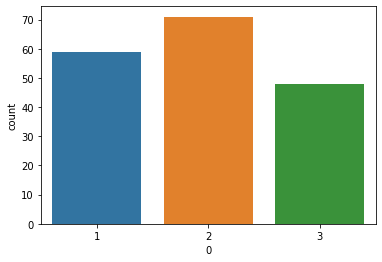

In [10]:
import seaborn as sns

sns.countplot(Data[0])

We will start the implemention by using limited number of features and if we could not get high accuracy, we will add more features. In this regard, the correlation model will be model, and based on that we will be able to choose the most correlate feature and start the model by using them. 

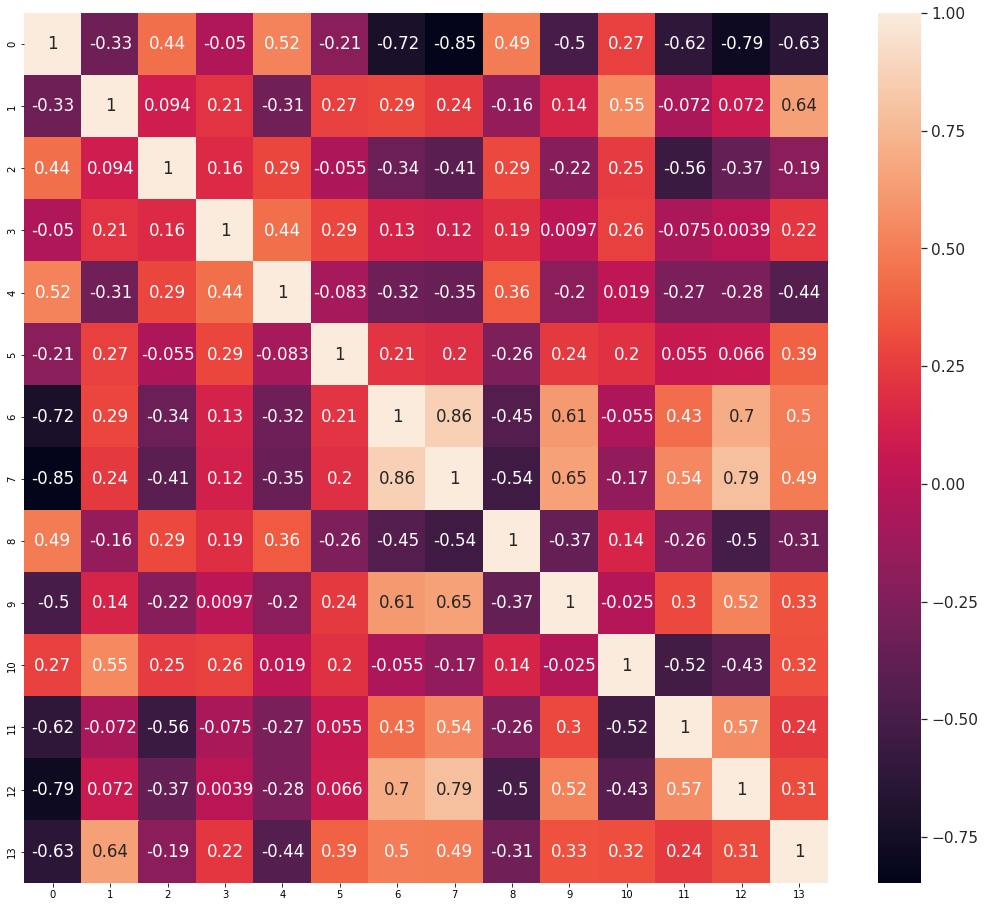

In [41]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(18,16))
sns.set(rc={"figure.figsize":(20, 18)})
sns.set(font_scale=1.4)

fig1 = sns.heatmap(Data.corr(), annot=True, ax=ax)

As we see at correlation figure, we can realize that feature 6, 7, 10, 11, and 12 have the most correlation, so we start with these feature and we will analyze the accuracy of different models based on these features, if we did not get good prediction, then we will add more features.

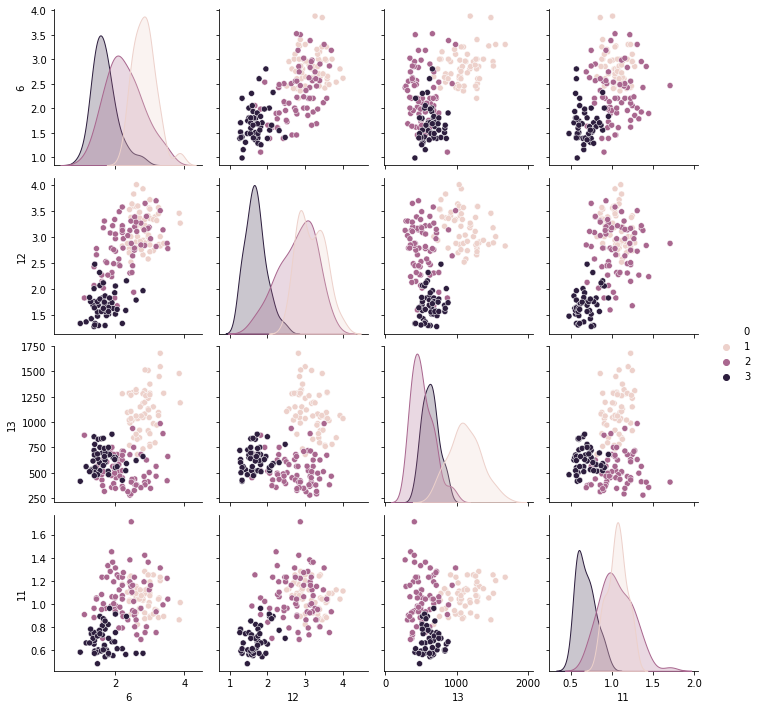

In [13]:
sns.pairplot(Data[[0,6,12,13,11]], hue=0)

In [14]:
y = Data.iloc[:,[0]]
x = Data.iloc[:,1:]


In [15]:
print(y)

     0
0    1
1    1
2    1
3    1
4    1
..  ..
173  3
174  3
175  3
176  3
177  3

[178 rows x 1 columns]


Text(0.5, 1.0, 'wine')

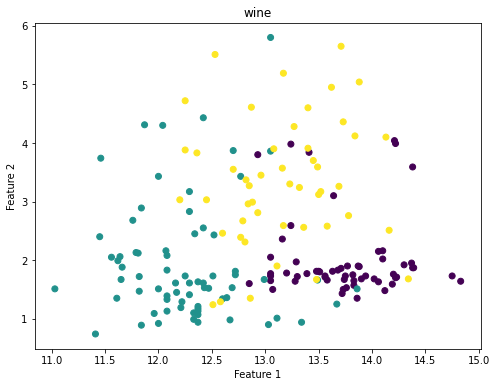

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(Data[1], Data[2],c=Data[0],)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('wine')


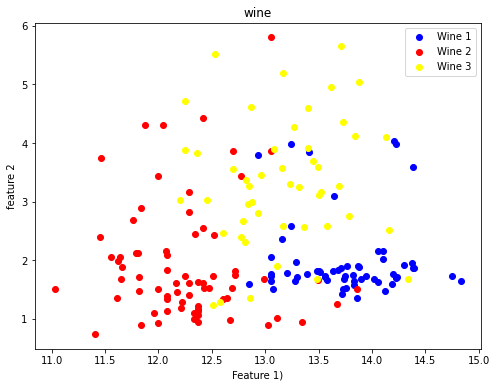

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(Data[1][Data[0]==1], Data[2][Data[0]==1],label= 'Wine 1',color='blue')
plt.scatter(Data[1][Data[0]==2], Data[2][Data[0]==2],label='Wine 2',color='red')
plt.scatter(Data[1][Data[0]==3], Data[2][Data[0]==3],label='Wine 3',color='yellow')
plt.xlabel("Feature 1)")
plt.ylabel("feature 2")
plt.title('wine')
plt.legend()

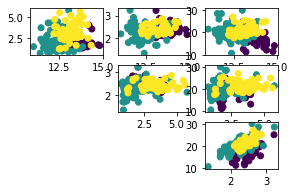

In [18]:
import matplotlib.pyplot as plt

plt.subplot(4,4,2)
plt.scatter(Data[1], Data[2],c=Data[0])
plt.subplot(4,4,3)
plt.scatter(Data[1], Data[3],c=Data[0])
plt.subplot(4,4,4)
plt.scatter(Data[1], Data[4],c=Data[0])
plt.subplot(4,4,7)
plt.scatter(Data[2], Data[3],c=Data[0])
plt.subplot(4,4,8)
plt.scatter(Data[2], Data[4],c=Data[0])
plt.subplot(4,4,12)
plt.scatter(Data[3], Data[4],c=Data[0])

In [19]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

Scaler.fit(x)
x_scaled = Scaler.transform(x)


In [20]:
x_scaled=pd.DataFrame(x_scaled)
x_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Data will be splited to 70% train and 30% test.
(In this section we can use selection feature(5, 6, 10, 11, 12) or all the features)

In [21]:
from sklearn.model_selection import train_test_split
# select features
x_scaled_selected = x_scaled[[5,6,10,11,12]]

#all features
#x_scaled_selected = x_scaled

#split
x_train, x_test, y_train, y_test = train_test_split(x_scaled_selected,y,test_size=0.3,random_state=40)

In [23]:
print(f"Shape of X trian: {x_train.shape}");
print(f"Shape of X text: {x_test.shape}");
print(f"Shape of y trian: {y_train.shape}");
print(f"Shape of y text: {y_test.shape}");

Shape of X trian: (124, 5)
Shape of X text: (54, 5)
Shape of y trian: (124, 1)
Shape of y text: (54, 1)


In order to classify the records, we need to use classification models. In this project we will use 4 different algorithm. KNN, MDC, SVM, and LG will be implement and at the end the results will be compared.

In [24]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier(n_neighbors=6)

In [25]:
modelKNN.fit(x_train, y_train);
y_train_predKNN =  modelKNN.predict(x_train)
y_test_predKNN = modelKNN.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [26]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
Acc_KNN = accuracy_score(y_test, y_test_predKNN)
F1_Score_KNN = f1_score(y_test, y_test_predKNN, average='weighted')
Precision_KNN = precision_score(y_test, y_test_predKNN,average='weighted')
Recall_KNN = recall_score(y_test, y_test_predKNN,average='weighted')

In [27]:
print(Acc_KNN)
print(F1_Score_KNN)
print(Precision_KNN)
print(Recall_KNN)

0.9074074074074074
0.9053883661726798
0.9239278752436648
0.9074074074074074


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


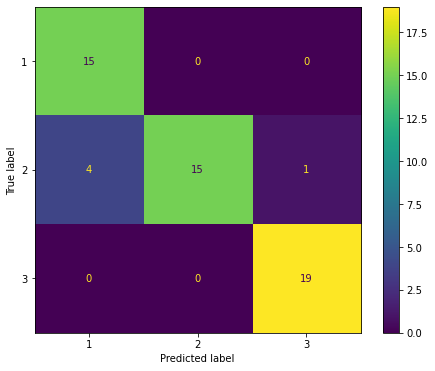

In [28]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(modelKNN ,x_test,y_test, ax=ax)

In [29]:
from sklearn.neighbors import NearestCentroid
modelMDC = NearestCentroid()
modelMDC.fit(x_train, y_train)
y_train_predMDC =  modelMDC.predict(x_train)
y_test_predMDC = modelMDC.predict(x_test)
Acc_MDC = accuracy_score(y_test, y_test_predMDC)
F1_Score_MDC = f1_score(y_test, y_test_predMDC, average='weighted')
Precision_MDC = precision_score(y_test, y_test_predMDC,average='weighted')
Recall_MDC = recall_score(y_test, y_test_predMDC,average='weighted')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:

Precision_MDC 

0.9664902998236331

In [31]:
print(Acc_MDC)
print(F1_Score_MDC)
print(Precision_MDC)
print(Recall_MDC)

0.9629629629629629
0.9629142300194931
0.9664902998236331
0.9629629629629629


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


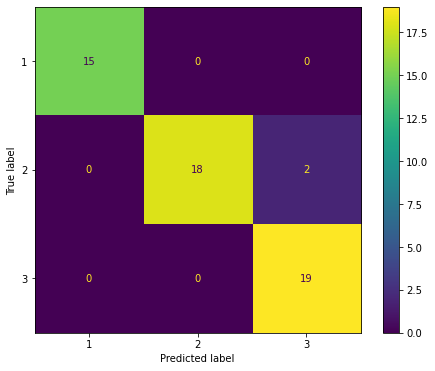

In [32]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(modelMDC ,x_test,y_test, ax=ax)

In [33]:
from sklearn import svm

modelSVM = svm.SVC(kernel='linear')
modelSVM.fit(x_train, y_train)
y_train_predSVM =  modelSVM.predict(x_train)
y_test_predSVM  = modelSVM.predict(x_test)
Acc_SVM = accuracy_score(y_test, y_test_predSVM)
F1_Score_SVM  = f1_score(y_test, y_test_predSVM, average='weighted')
Precision_SVM  = precision_score(y_test, y_test_predSVM,average='weighted')
Recall_SVM = recall_score(y_test, y_test_predSVM,average='weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
Acc_SVM

0.9814814814814815

In [35]:
print(Acc_SVM)
print(F1_Score_SVM)
print(Precision_SVM)
print(Recall_SVM)

0.9814814814814815
0.9814814814814815
0.9824074074074074
0.9814814814814815


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


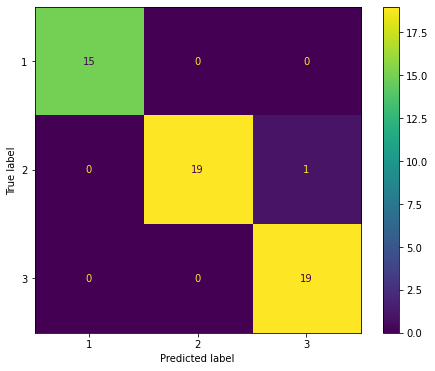

In [36]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(modelSVM ,x_test,y_test, ax=ax)

In [37]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(max_iter=2000)
modelLR.fit(x_train,y_train)
y_train_predLR =  modelLR.predict(x_train)
y_test_predLR  = modelLR.predict(x_test)

Acc_LR = accuracy_score(y_test, y_test_predLR)
F1_Score_LR  = f1_score(y_test, y_test_predLR, average='weighted')
Precision_LR  = precision_score(y_test, y_test_predLR,average='weighted')
Recall_LR = recall_score(y_test, y_test_predLR,average='weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
Acc_LR

1.0

In [39]:
print(Acc_LR)
print(F1_Score_LR)
print(Precision_LR)
print(Recall_LR)

1.0
1.0
1.0
1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


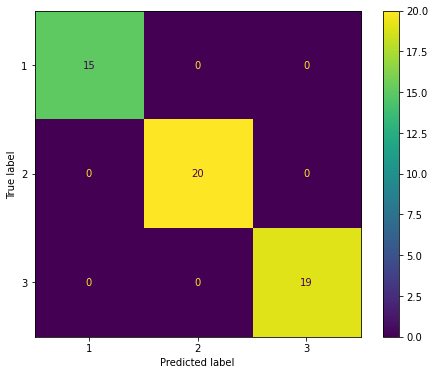

In [40]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(8, 6))
plot_confusion_matrix(modelLR ,x_test,y_test, ax=ax)

In [40]:
Selected features

	        KNN	    MDC	    SVM	    LG
Accuracy	0.90	  0.96	  0.98	  1.0
F1-Score	0.90	  0.96	  0.98	  1.0
Precision	0.92	  0.96	  0.98	  1.0
Recall	  0.90	  0.96	  0.98	  1.0


In [ ]:
All the features

	        KNN	    MDC	  SVM	    LG
Accuracy	0.92	  1.0	  0.96	  0.98
F1-Score	0.92	  1.0	  0.96	  0.98
Precision	0.93	  1.0	  0.96	  0.98
Recall	  0.92	  1.0	  0.96	  0.98

As we see LG has the most accurate prediction, and then SVM, MDC, and KNN are in seond, third, and forth levels. However, all the algorithms have acceptable results, and without using other features we are able to predict the model. 
When we add all the features to predict the data MDC works more accurate, LG and SVM are in other levels, and KNN stand at the final level. 
.The most obvious result that we can conclude from the implementation of the algorithms is, the more feature added, the more accurate the model will be. Besides, we can conclude there is no any best algorithm in classification, in fact it depends on the data and also the how many features are extracted, so the best way for choosing an algorithm is trying some of them, and compare them together.

